In [51]:
import pandas as pd
import yfinance as yf
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(15,15))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data.iloc[:,x], data.iloc[:,y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    # for i, j in zip(range(numdata), itertools.cycle((-1, 0))):
    #     print(i, j)
    #     axes[j,i].xaxis.set_visible(True)
    #     axes[i,j].yaxis.set_visible(True)

    return fig   

[*********************100%***********************]  3 of 3 completed


<AxesSubplot:xlabel='Date'>

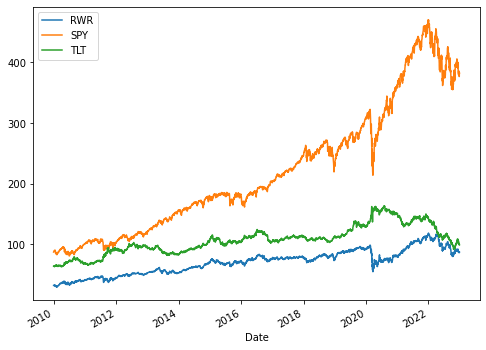

In [52]:
tickers_list = ['SPY', 'TLT', 'RWR']
df = yf.download(tickers_list, start= '2010-1-1', end='2022-12-31')['Adj Close']
df.plot(figsize=(8,6))

In [53]:
daily_returns_df = np.log(df/df.shift(1)).dropna()

In [54]:
df.isnull().sum()

RWR    0
SPY    0
TLT    0
dtype: int64

In [55]:
daily_returns_df.describe()

,RWR,SPY,TLT
count,3272.000000,3272.000000,3272.000000
mean,0.000308,0.000453,0.000135
std,0.013860,0.011131,0.009511
min,-0.202247,-0.115886,-0.069010
25%,-0.005650,-0.003735,-0.005493
50%,0.000920,0.000654,0.000562
75%,0.007121,0.005736,0.005752
max,0.090170,0.086731,0.072502


<AxesSubplot:xlabel='Date'>

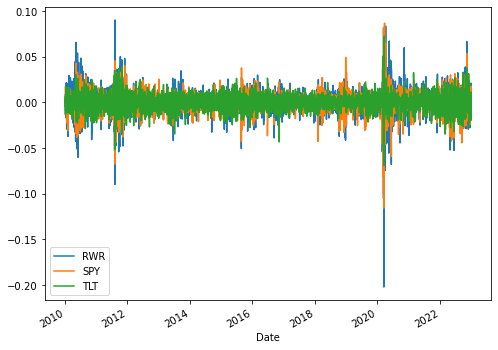

In [56]:
daily_returns_df.plot(figsize=(8,6))

C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:28: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:30: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:32: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and

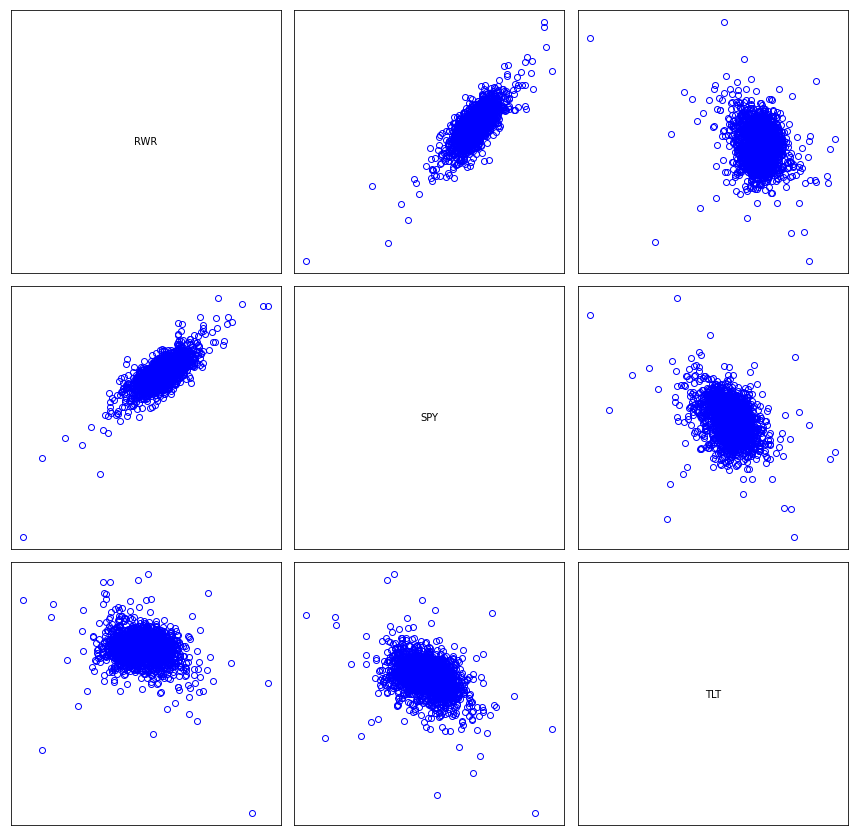

In [57]:
fig = scatterplot_matrix(daily_returns_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


In [58]:
mvnorm = st.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
x = mvnorm.rvs(10000)

In [59]:
x

array([[ 0.74738262,  0.4132649 ],
       [ 1.3227144 ,  0.86613662],
       [-1.38728763, -0.8128434 ],
       ...,
       [-0.20474031, -1.21435212],
       [-0.59611706,  0.60897079],
       [-0.10563795,  0.95627625]])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


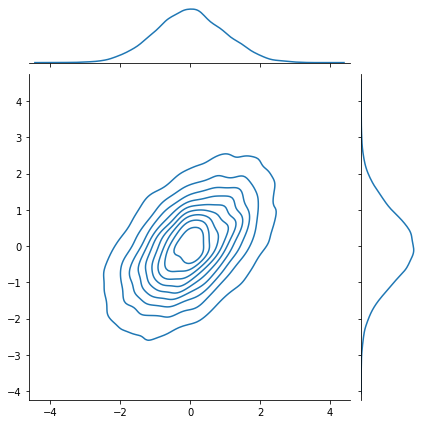

In [60]:
sns.jointplot(x[:, 0], x[:, 1], kind='kde')


In [61]:
x[:,1]

array([ 0.4132649 ,  0.86613662, -0.8128434 , ..., -1.21435212,
        0.60897079,  0.95627625])

In [62]:
x

array([[ 0.74738262,  0.4132649 ],
       [ 1.3227144 ,  0.86613662],
       [-1.38728763, -0.8128434 ],
       ...,
       [-0.20474031, -1.21435212],
       [-0.59611706,  0.60897079],
       [-0.10563795,  0.95627625]])

In [63]:
x[:,0]

array([ 0.74738262,  1.3227144 , -1.38728763, ..., -0.20474031,
       -0.59611706, -0.10563795])

In [64]:
x[::,1]

array([ 0.4132649 ,  0.86613662, -0.8128434 , ..., -1.21435212,
        0.60897079,  0.95627625])

In [65]:
x[::,0]

array([ 0.74738262,  1.3227144 , -1.38728763, ..., -0.20474031,
       -0.59611706, -0.10563795])

In [66]:
x_unif = st.norm.cdf(x)


In [67]:
x_unif

array([[0.77258368, 0.66029373],
       [0.90703481, 0.80679238],
       [0.08267704, 0.20815392],
       ...,
       [0.41888751, 0.11230665],
       [0.27554851, 0.7287281 ],
       [0.45793481, 0.83053366]])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


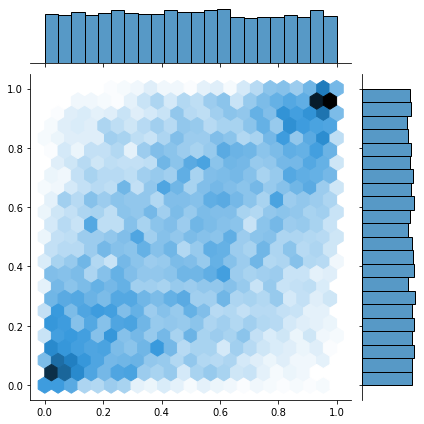

In [68]:
sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

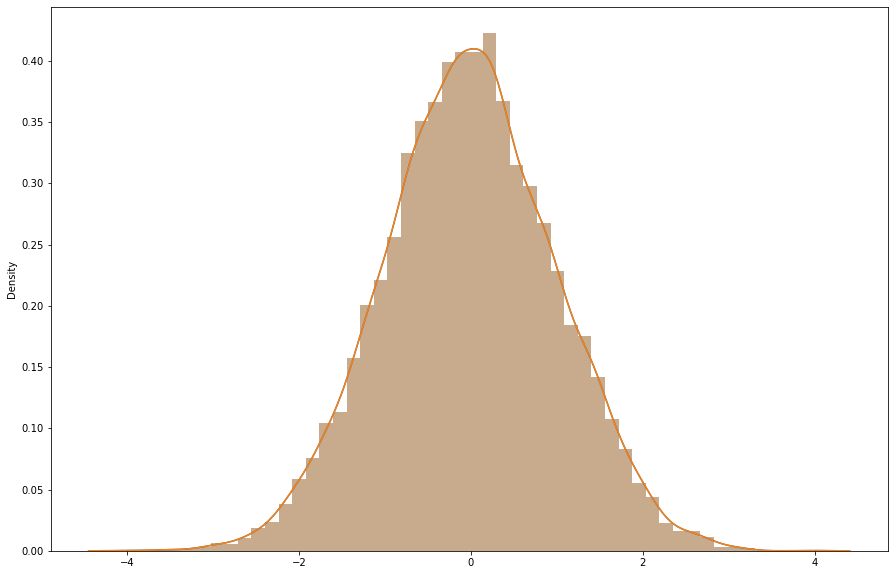

In [69]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.norm.ppf(x_unif[:,0]), ax=ax)
sns.distplot(x[:, 0], ax=ax)

In [70]:
st.norm.ppf(x_unif[:,0])

array([ 0.74738262,  1.3227144 , -1.38728763, ..., -0.20474031,
       -0.59611706, -0.10563795])

In [71]:
import scipy.stats as sc

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

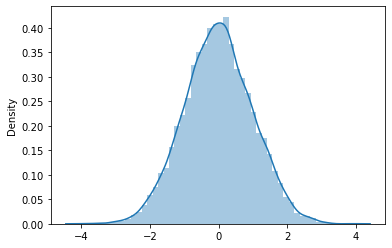

In [72]:
sns.distplot(st.norm.ppf(x_unif[:,0]))


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

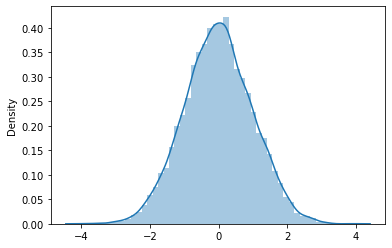

In [73]:
sns.distplot(x[:, 0])

In [74]:
st.norm.ppf(x_unif[:,0])

array([ 0.74738262,  1.3227144 , -1.38728763, ..., -0.20474031,
       -0.59611706, -0.10563795])

In [37]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(x)

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


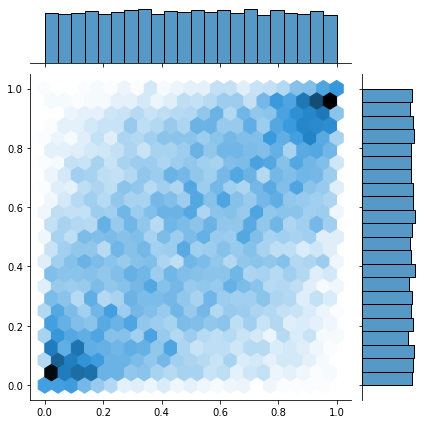

In [39]:
x1 = copula.univariates[0].cdf(x[:,0])
x2 = copula.univariates[1].cdf(x[:,1])
sns.jointplot(x1, x2, kind='hex')

In [40]:
from copulas.visualization import compare_3d


In [41]:
x1 = copula.univariates[0].cdf(x[:,0])


In [48]:
x1

array([0.49974057, 0.50193033, 0.50133973, ..., 0.49400714, 0.51031854,
       0.499228  ])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


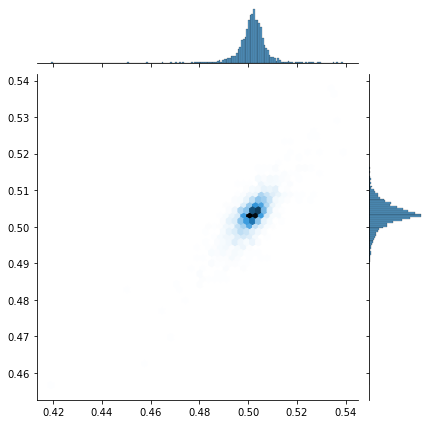

In [49]:
#Y1 = copula.univariates[0].cdf(daily_returns_df['RWR'])
Y2 = copula.univariates[1].cdf(daily_returns_df['SPY'])
sns.jointplot(Y1, Y2, kind='hex')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

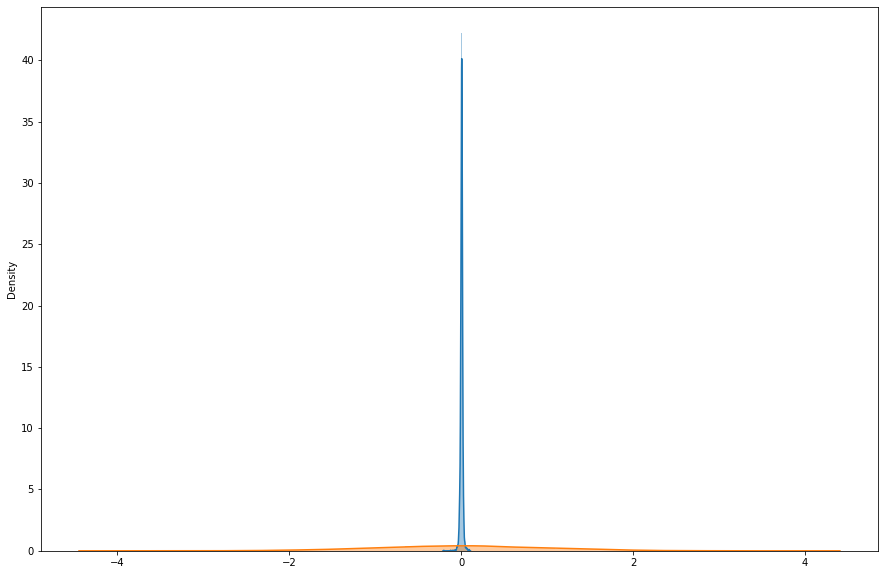

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.norm.ppf(x1), ax=ax)
sns.distplot(x[:, 0], ax=ax)

In [76]:
copula = GaussianMultivariate()
copula.fit(daily_returns_df)

marginal_cdfs = {}
for i, j in enumerate(daily_returns_df.columns):
    marginal = copula.univariates[i].cdf(daily_returns_df.iloc[:,i])
    marginal_cdfs[j] = marginal
marginal_cdfs_df = pd.DataFrame.from_dict(marginal_cdfs)
marginal_cdfs_df

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
C:\Users\jahan laptop\anaconda3\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in scalar divide
  a = (self.min - loc) / scale
C:\Users\jahan l

,RWR,SPY,TLT
0,0.296992,0.949695,0.438001
1,0.497595,0.598022,0.769601
2,0.438810,0.488405,0.072731
3,0.801808,0.678713,0.558982
4,0.173850,0.634186,0.458030
...,...,...,...
3267,0.780321,0.745611,0.056737
3268,0.454430,0.253301,0.019476
3269,0.066199,0.069567,0.240449
3270,0.959050,0.955590,0.902508


In [77]:
marginal_cdfs_df.describe()

,RWR,SPY,TLT
count,3272.000000,3272.000000,3272.000000
mean,0.500000,0.495706,0.500000
std,0.282714,0.288164,0.284809
min,0.000153,0.000425,0.000153
25%,0.261833,0.262009,0.254395
50%,0.501894,0.485569,0.505088
75%,0.740886,0.745613,0.743383
max,0.999845,0.999070,0.999847


<AxesSubplot:>

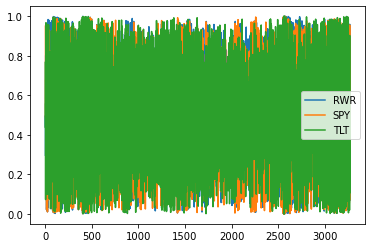

In [78]:
marginal_cdfs_df.plot()

<AxesSubplot:ylabel='Frequency'>

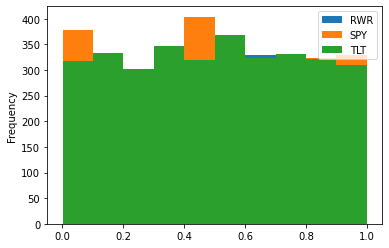

In [79]:
marginal_cdfs_df.plot(kind='hist')

In [80]:
daily_returns_df.iloc[:,1]

Date
2010-01-04    0.016817
2010-01-05    0.002644
2010-01-06    0.000704
2010-01-07    0.004212
2010-01-08    0.003322
                ...   
2022-12-23    0.005736
2022-12-27   -0.003951
2022-12-28   -0.012506
2022-12-29    0.017840
2022-12-30   -0.002638
Name: SPY, Length: 3272, dtype: float64

In [81]:
daily_returns_df.iloc[:,2]

Date
2010-01-04   -0.000891
2010-01-05    0.006437
2010-01-06   -0.013477
2010-01-07    0.001681
2010-01-08   -0.000448
                ...   
2022-12-23   -0.014769
2022-12-27   -0.019971
2022-12-28   -0.005909
2022-12-29    0.011287
2022-12-30   -0.011187
Name: TLT, Length: 3272, dtype: float64

In [83]:
daily_returns_df.iloc[:,0]

Date
2010-01-04   -0.004481
2010-01-05    0.000817
2010-01-06   -0.000612
2010-01-07    0.009142
2010-01-08   -0.009346
                ...   
2022-12-23    0.008385
2022-12-27   -0.000229
2022-12-28   -0.018358
2022-12-29    0.021100
2022-12-30   -0.005721
Name: RWR, Length: 3272, dtype: float64

In [84]:
daily_returns_df.iloc[1]

RWR    0.000817
SPY    0.002644
TLT    0.006437
Name: 2010-01-05 00:00:00, dtype: float64

In [85]:
daily_returns_df.iloc[3071]

RWR    0.011558
SPY    0.021932
TLT    0.009760
Name: 2022-03-16 00:00:00, dtype: float64

In [87]:
copula.univariates[1].cdf(1)


0.9999982561894205

In [90]:
copula.univariates[1].cdf(2)


0.9999997053787533

In [91]:
copula.univariates[1].cdf(0)


0.44825055121030744

In [92]:
copula.covariance


,RWR,SPY,TLT
RWR,1.000000,0.690814,-0.141049
SPY,0.690814,1.000000,-0.362749
TLT,-0.141049,-0.362749,1.000000


In [93]:
daily_returns_df.corr()

,RWR,SPY,TLT
RWR,1.000000,0.755006,-0.184722
SPY,0.755006,1.000000,-0.374610
TLT,-0.184722,-0.374610,1.000000


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:28: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:30: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_14464/1348599300.py:32: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and

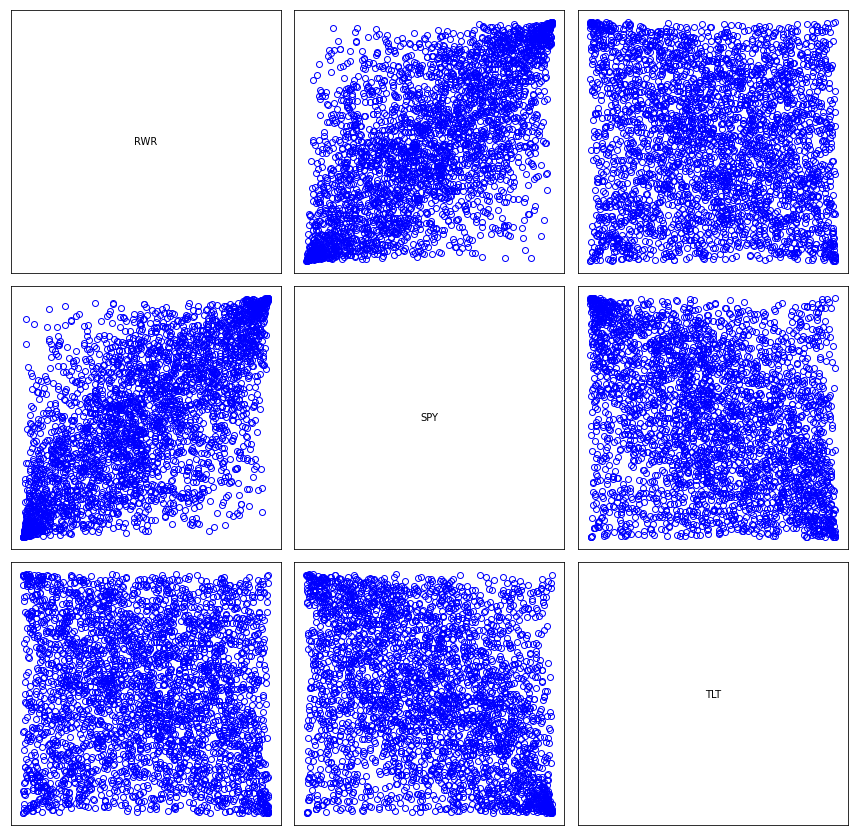

In [94]:
fig = scatterplot_matrix(marginal_cdfs_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


<AxesSubplot:ylabel='RWR'>

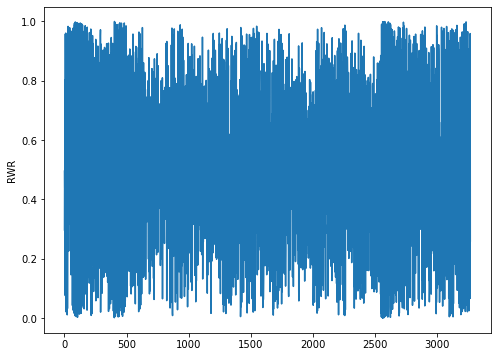

In [98]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=marginal_cdfs_df.iloc[:,0], ax=ax)

<AxesSubplot:ylabel='SPY'>

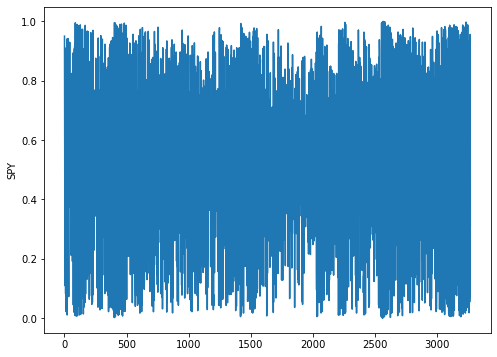

In [99]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=marginal_cdfs_df.iloc[:,1], ax=ax)

<AxesSubplot:ylabel='TLT'>

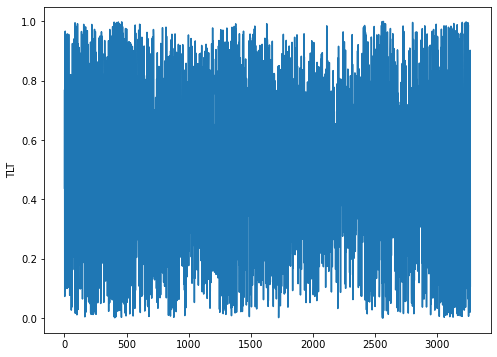

In [100]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=marginal_cdfs_df.iloc[:,2], ax=ax)

In [101]:
marginal_cdfs_df.iloc[:,2]

0       0.438001
1       0.769601
2       0.072731
3       0.558982
4       0.458030
          ...   
3267    0.056737
3268    0.019476
3269    0.240449
3270    0.902508
3271    0.107840
Name: TLT, Length: 3272, dtype: float64

<AxesSubplot:ylabel='Frequency'>

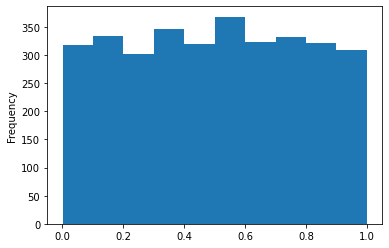

In [102]:
marginal_cdfs_df.iloc[:,2].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

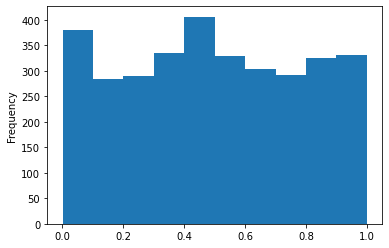

In [103]:
marginal_cdfs_df.iloc[:,1].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

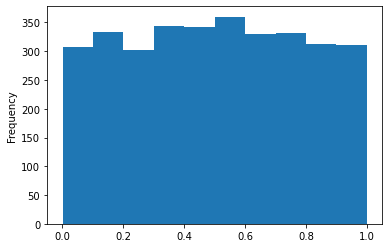

In [104]:
marginal_cdfs_df.iloc[:,0].plot(kind='hist')

In [125]:
st.t.ppf(marginal_cdfs_df.iloc[:,0], df=3)


array([-0.5945783 , -0.00654289, -0.16751502, ..., -2.05287381,
        2.57831063, -0.72734105])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

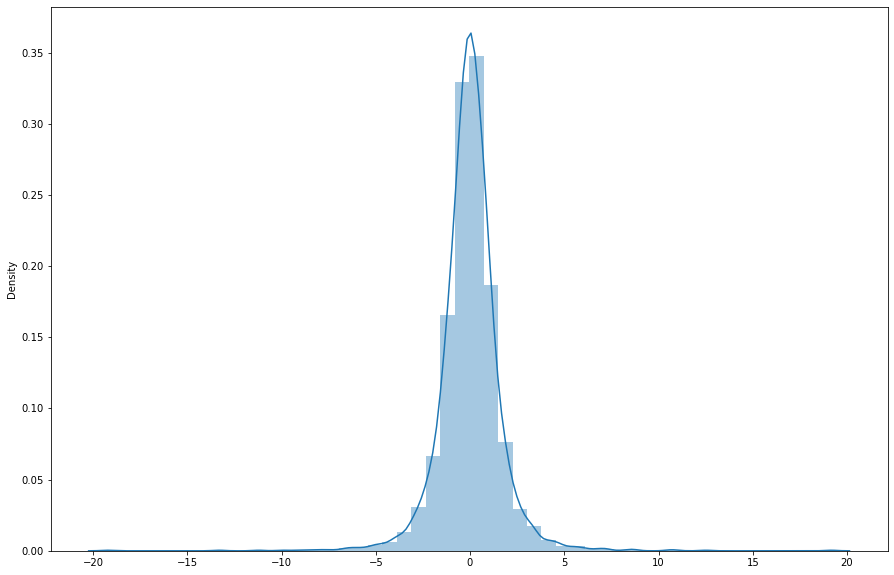

In [126]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.t.ppf(marginal_cdfs_df.iloc[:,0], df=3), ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

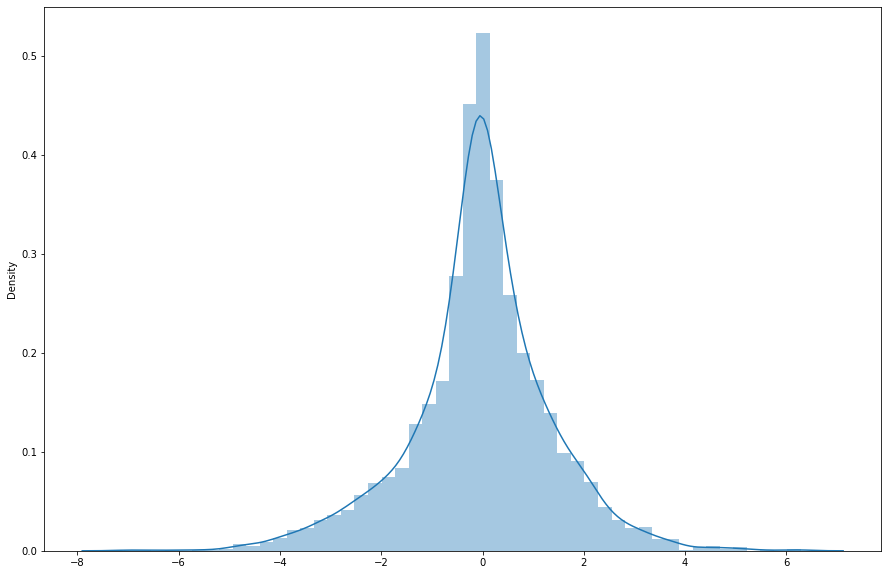

In [127]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.laplace.ppf(marginal_cdfs_df.iloc[:,1]), ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

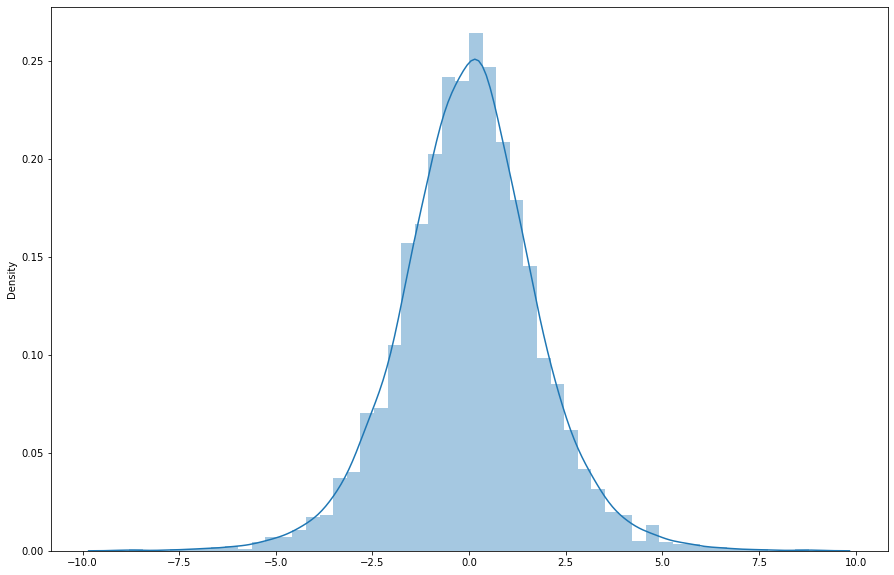

In [128]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.logistic.ppf(marginal_cdfs_df.iloc[:,2]), ax=ax)

In [129]:
st.t.ppf(marginal_cdfs_df.iloc[:,0], df=3)


array([-0.5945783 , -0.00654289, -0.16751502, ..., -2.05287381,
        2.57831063, -0.72734105])

<AxesSubplot:>

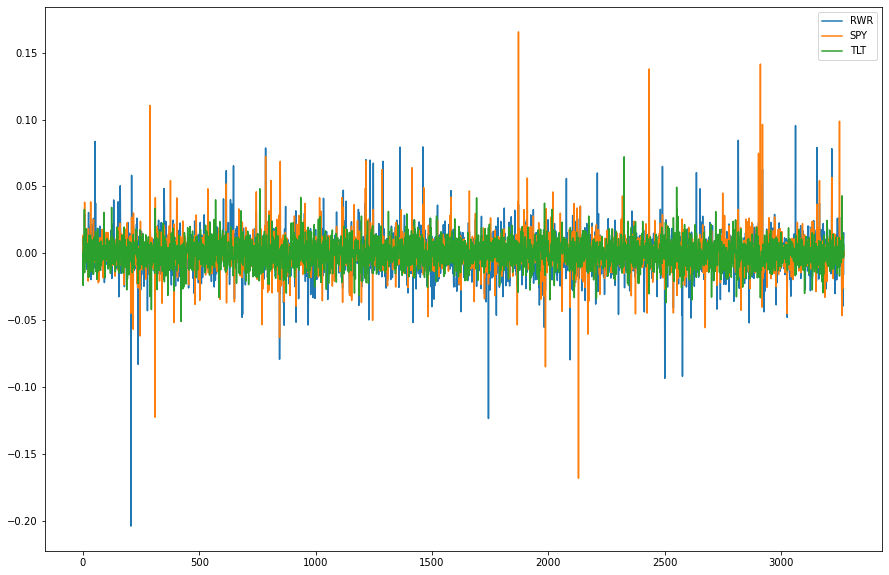

In [130]:
synthetic = copula.sample(len(marginal_cdfs_df))
synthetic.plot(figsize=(15,10))

In [132]:
synthetic

,RWR,SPY,TLT
0,-0.000199,-0.007729,0.000603
1,0.002871,0.013502,-0.024069
2,0.002197,-0.003703,0.012008
3,0.010861,0.000851,-0.007008
4,0.004720,-0.005115,0.005451
...,...,...,...
3267,-0.039489,-0.026199,0.014134
3268,0.003289,0.011199,-0.003586
3269,-0.016188,-0.005263,0.007464
3270,0.008510,0.001591,0.006236


In [133]:
synthetic.describe()

,RWR,SPY,TLT
count,3272.000000,3272.000000,3272.000000
mean,0.000505,0.001021,0.000190
std,0.014653,0.012992,0.009738
min,-0.203951,-0.168135,-0.050954
25%,-0.006147,-0.003969,-0.005689
50%,0.001057,0.000992,0.000473
75%,0.007547,0.005785,0.006101
max,0.095509,0.165510,0.072110


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


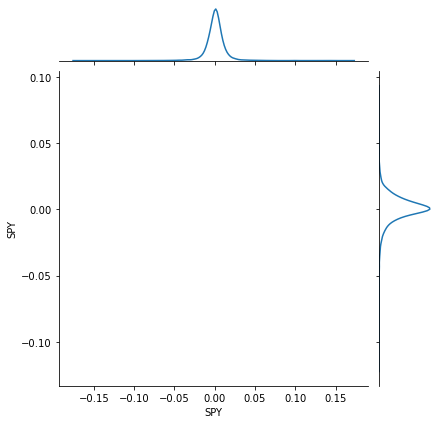

In [136]:
sns.jointplot(synthetic.iloc[:,1], daily_returns_df.iloc[:, 1], kind='kde')


In [123]:
daily_returns_df

,RWR,SPY,TLT
Date,,,
2010-01-04,-0.004481,0.016817,-0.000891
2010-01-05,0.000817,0.002644,0.006437
2010-01-06,-0.000612,0.000704,-0.013477
2010-01-07,0.009142,0.004212,0.001681
2010-01-08,-0.009346,0.003322,-0.000448
...,...,...,...
2022-12-23,0.008385,0.005736,-0.014769
2022-12-27,-0.000229,-0.003951,-0.019971
2022-12-28,-0.018358,-0.012506,-0.005909


In [124]:
marginal_cdfs_df

,RWR,SPY,TLT
0,0.296992,0.949695,0.438001
1,0.497595,0.598022,0.769601
2,0.438810,0.488405,0.072731
3,0.801808,0.678713,0.558982
4,0.173850,0.634186,0.458030
...,...,...,...
3267,0.780321,0.745611,0.056737
3268,0.454430,0.253301,0.019476
3269,0.066199,0.069567,0.240449
3270,0.959050,0.955590,0.902508


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


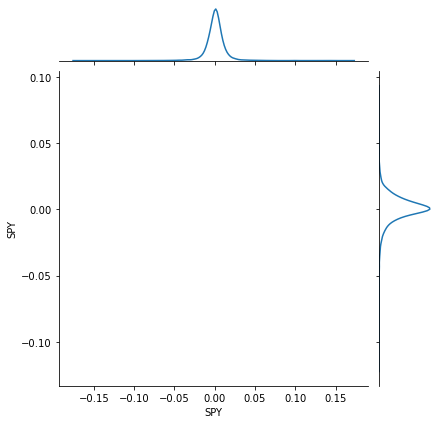

In [137]:
sns.jointplot(synthetic.iloc[:,1], daily_returns_df.iloc[:, 1], kind='kde')


In [138]:
marginal_cdfs_df.iloc[:,0]

0       0.296992
1       0.497595
2       0.438810
3       0.801808
4       0.173850
          ...   
3267    0.780321
3268    0.454430
3269    0.066199
3270    0.959050
3271    0.259820
Name: RWR, Length: 3272, dtype: float64

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RWR', ylabel='Density'>

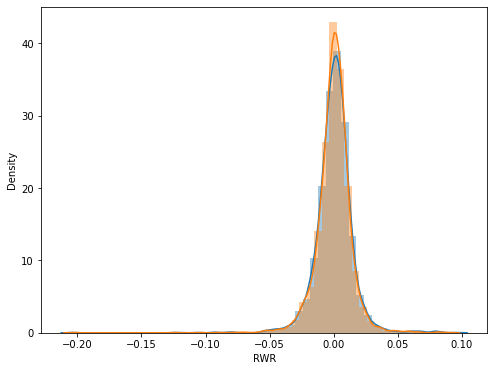

In [139]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(synthetic.iloc[:,0], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 0], ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPY', ylabel='Density'>

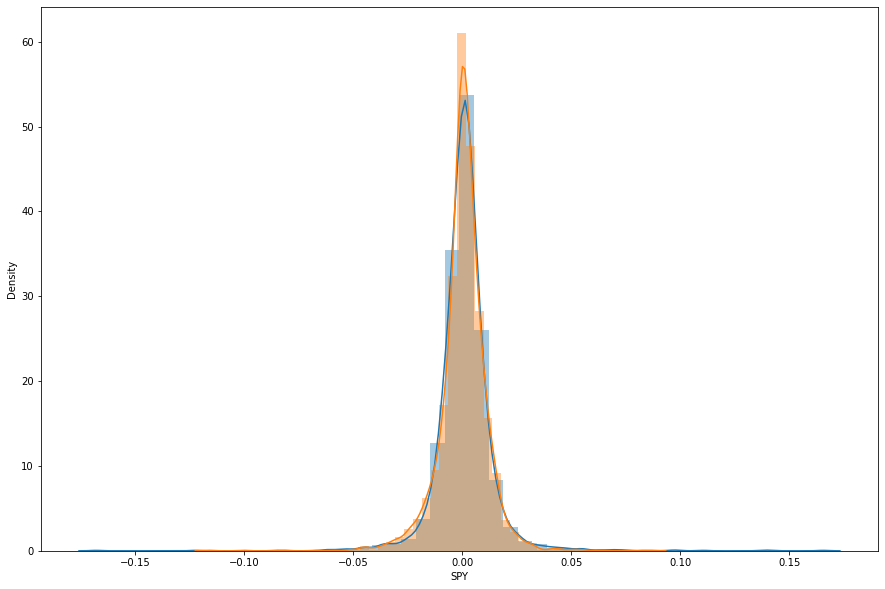

In [140]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(synthetic.iloc[:,1], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 1], ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TLT', ylabel='Density'>

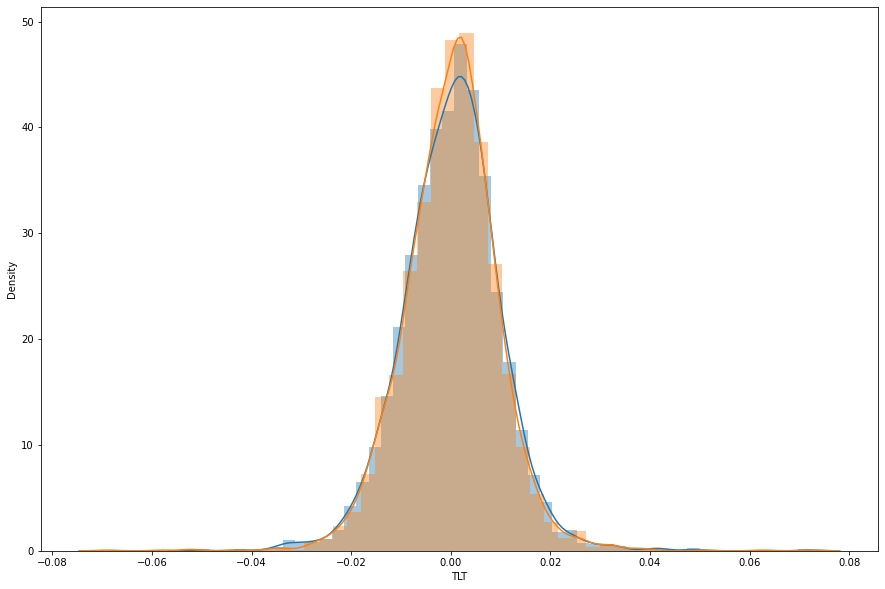

In [141]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(synthetic.iloc[:,2], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 2], ax=ax)

In [142]:
from copulae import StudentCopula

copula_t = StudentCopula(dim=len(daily_returns_df.columns))
copula_t.fit(data=daily_returns_df)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [143]:
copula_t.summary()


1.000000,0.667505,-0.108526
0.667505,1.000000,-0.362285
-0.108526,-0.362285,1.000000


In [147]:


copula_t.fit

<bound method StudentCopula.fit of <copulae.elliptical.student.StudentCopula object at 0x000002A37734CBB0>>

In [148]:
copula_t.fit(data=daily_returns_df).summary()

               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


1.000000,0.667505,-0.108526
0.667505,1.000000,-0.362285
-0.108526,-0.362285,1.000000


In [152]:
copula_t.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [165]:
copula_t.fit(data=daily_returns_df).summary()


               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


1.000000,0.667505,-0.108526
0.667505,1.000000,-0.362285
-0.108526,-0.362285,1.000000


In [166]:
from copulae.stats import multivariate_t as mvt, t
copula_t_synthetic = mvt.rvs(cov=copula_t.sigma, df=copula_t._df, size=len(daily_returns_df))
copula_t_synthetic = pd.DataFrame(copula_t_synthetic)

In [167]:
copula_t_synthetic

,0,1,2
0,-0.343715,0.314069,0.170708
1,0.453101,-0.716290,1.730577
2,-1.607527,-2.118718,1.675564
3,-0.055442,0.794889,-1.351702
4,-2.277659,-1.238330,-0.505145
...,...,...,...
3267,-0.906879,-0.140578,0.810171
3268,2.430121,1.382376,1.308096
3269,-0.467138,0.156812,1.705333
3270,1.257161,1.952292,-0.251537


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RWR', ylabel='Density'>

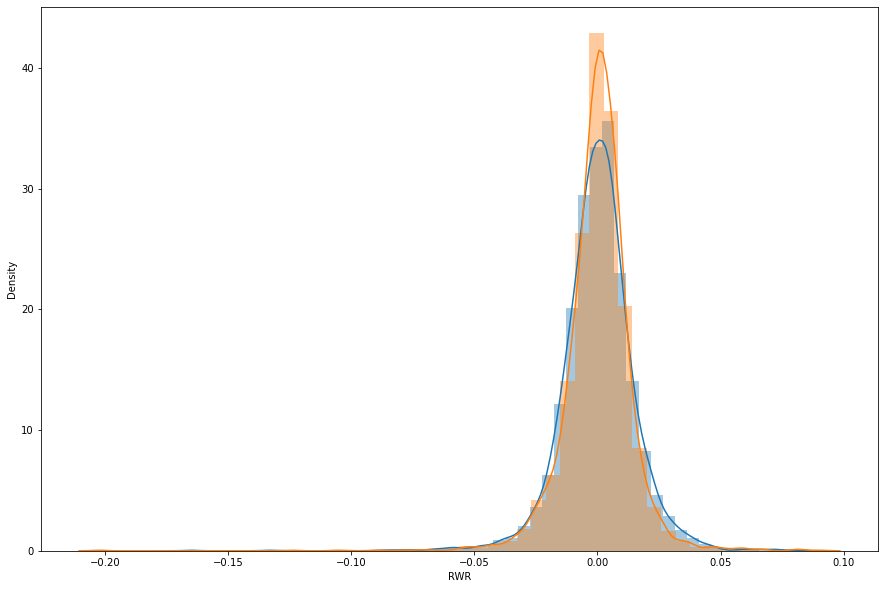

In [168]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(copula_t_synthetic.iloc[:,0] / 100, ax=ax)
sns.distplot(daily_returns_df.iloc[:,0], ax=ax)

In [169]:
copula_t_synthetic.iloc[:,0] / 100

0      -0.003437
1       0.004531
2      -0.016075
3      -0.000554
4      -0.022777
          ...   
3267   -0.009069
3268    0.024301
3269   -0.004671
3270    0.012572
3271   -0.006306
Name: 0, Length: 3272, dtype: float64

In [170]:
copula_t_synthetic.columns = daily_returns_df.columns


In [171]:
weights = [1/len(synthetic.columns) for i in range(0, len(synthetic.columns))]
daily_portfolio_returns_df = daily_returns_df * weights
daily_portfolio_returns_df['portfolio_ret'] = daily_portfolio_returns_df.sum(axis=1)

In [172]:
weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [173]:
daily_portfolio_returns_df

,RWR,SPY,TLT,portfolio_ret
Date,,,,
2010-01-04,-0.001494,0.005606,-0.000297,0.003815
2010-01-05,0.000272,0.000881,0.002146,0.003299
2010-01-06,-0.000204,0.000235,-0.004492,-0.004462
2010-01-07,0.003047,0.001404,0.000560,0.005012
2010-01-08,-0.003115,0.001107,-0.000149,-0.002157
...,...,...,...,...
2022-12-23,0.002795,0.001912,-0.004923,-0.000216
2022-12-27,-0.000076,-0.001317,-0.006657,-0.008050
2022-12-28,-0.006119,-0.004169,-0.001970,-0.012258


In [174]:
daily_portfolio_returns_df.describe()

,RWR,SPY,TLT,portfolio_ret
count,3272.000000,3272.000000,3272.000000,3272.000000
mean,0.000103,0.000151,0.000045,0.000299
std,0.004620,0.003710,0.003170,0.007538
min,-0.067416,-0.038629,-0.023003,-0.085126
25%,-0.001883,-0.001245,-0.001831,-0.002996
50%,0.000307,0.000218,0.000187,0.000665
75%,0.002374,0.001912,0.001917,0.004042
max,0.030057,0.028910,0.024167,0.052635


<AxesSubplot:xlabel='Date'>

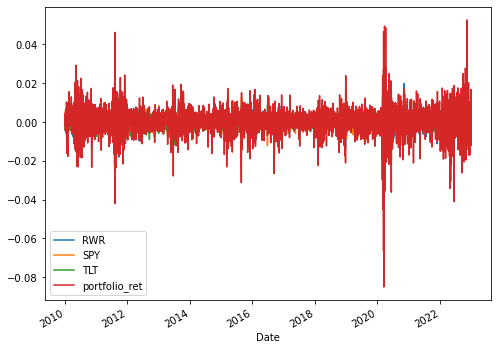

In [176]:
daily_portfolio_returns_df.plot(figsize=(8,6))

<AxesSubplot:xlabel='Date'>

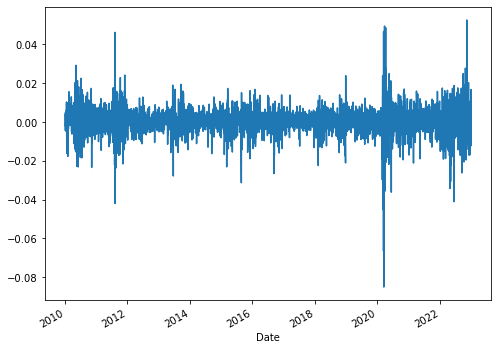

In [178]:
daily_portfolio_returns_df['portfolio_ret'].plot(figsize=(8,6))

In [179]:
daily_portfolio_returns_df['portfolio_ret'].describe()

count    3272.000000
mean        0.000299
std         0.007538
min        -0.085126
25%        -0.002996
50%         0.000665
75%         0.004042
max         0.052635
Name: portfolio_ret, dtype: float64

In [180]:
daily_portfolio_returns_df['portfolio_ret'].skew()

-1.0893310666807365

In [181]:
daily_portfolio_returns_df['portfolio_ret'].kurtosis()

15.552482226430488

In [182]:
st.skew( daily_portfolio_returns_df['portfolio_ret'])

-1.088831615359599

In [183]:
st.kurtosis(daily_portfolio_returns_df['portfolio_ret'] )

15.526893194405229

<AxesSubplot:ylabel='Frequency'>

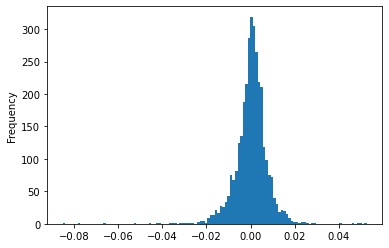

In [185]:
daily_portfolio_returns_df['portfolio_ret'].plot(kind='hist', bins=120)

<AxesSubplot:xlabel='portfolio_ret', ylabel='Count'>

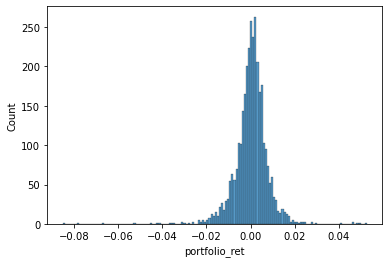

In [187]:
sns.histplot( daily_portfolio_returns_df['portfolio_ret'])

In [188]:
portfolio_returns_df = synthetic * weights
portfolio_returns_df['portfolio_ret'] = portfolio_returns_df.sum(axis=1)


In [191]:
portfolio_returns_df['portfolio_ret'].quantile(0.1)

-0.007527278841913287

In [192]:
portfolio_returns_df['portfolio_ret'].quantile(0.1)*100

-0.7527278841913286

In [193]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.1)['portfolio_ret']
copula_portfolio_CVaR = np.mean(portfolio_returns_df['portfolio_ret'][portfolio_returns_df['portfolio_ret'] < - copula_portfolio_VaR])
print('Portfolio copula VaR', copula_portfolio_VaR * 100, 'CVaR', copula_portfolio_CVaR * 100)

Portfolio copula VaR -0.7527278841913286 CVaR -0.12639648992715052


In [194]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.5)['portfolio_ret']
copula_portfolio_CVaR = np.mean(portfolio_returns_df['portfolio_ret'][portfolio_returns_df['portfolio_ret'] < - copula_portfolio_VaR])
print('Portfolio copula VaR', copula_portfolio_VaR * 100, 'CVaR', copula_portfolio_CVaR * 100)

Portfolio copula VaR 0.059422902905258417 CVaR -0.5887634940024781


In [195]:
covariance = daily_returns_df.cov()
mean_vec = daily_returns_df.mean(axis=0)
norm_synthetic = pd.DataFrame(st.multivariate_normal.rvs(mean_vec, covariance, size=100))
portfolio_norm_returns_df = norm_synthetic * weights
portfolio_norm_returns_df['portfolio_ret'] = portfolio_norm_returns_df.sum(axis=1)

norm_portfolio_VaR = portfolio_norm_returns_df.quantile(0.1)['portfolio_ret']
norm_portfolio_CVaR = np.mean(portfolio_norm_returns_df['portfolio_ret'][portfolio_norm_returns_df['portfolio_ret'] < - norm_portfolio_VaR])
print('Portfolio normal VaR', norm_portfolio_VaR * 100, 'CVaR', norm_portfolio_CVaR * 100)

Portfolio normal VaR -0.747699589896254 CVaR -0.11811899382603606


In [196]:
portfolio_t_returns_df = copula_t_synthetic * weights
portfolio_t_returns_df['portfolio_ret'] = portfolio_t_returns_df.sum(axis=1)

In [197]:
portfolio_t_returns_df.head()


,RWR,SPY,TLT,portfolio_ret
0,-0.114572,0.104690,0.056903,0.047021
1,0.151034,-0.238763,0.576859,0.489129
2,-0.535842,-0.706239,0.558521,-0.683560
3,-0.018481,0.264963,-0.450567,-0.204085
4,-0.759220,-0.412777,-0.168382,-1.340378


In [198]:
copula_t_portfolio_VaR = portfolio_t_returns_df.quantile(0.1)['portfolio_ret']
copula_t_portfolio_CVaR = np.mean(portfolio_t_returns_df['portfolio_ret'][portfolio_t_returns_df['portfolio_ret'] < - copula_t_portfolio_VaR])
print('Portfolio copula t VaR', copula_t_portfolio_VaR, 'CVaR', copula_t_portfolio_CVaR)

Portfolio copula t VaR -0.9139390411783558 CVaR -0.18005195754803718


In [199]:
copula_t = StudentCopula(dim=len(daily_returns_df.columns))
copula_t.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [204]:
copula_t_portfolio_VaR = portfolio_t_returns_df.quantile(0.1)['portfolio_ret']
copula_t_portfolio_CVaR = np.mean(portfolio_t_returns_df['portfolio_ret'][portfolio_t_returns_df['portfolio_ret'] < - copula_t_portfolio_VaR])
print('Portfolio copula t VaR', copula_t_portfolio_VaR, 'CVaR', copula_t_portfolio_CVaR)

Portfolio copula t VaR -0.9139390411783558 CVaR -0.18005195754803718


In [205]:
from copulae import StudentCopula

copula_t = StudentCopula(dim=len(daily_returns_df.columns))
copula_t.fit(data=daily_returns_df)

               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


In [206]:
copula_t.fit(data=daily_returns_df).describe()

               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


AttributeError: 'StudentCopula' object has no attribute 'describe'

In [207]:
copula_t.fit(data=daily_returns_df).quantile(0.1)

               RWR          SPY          TLT
count  3272.000000  3272.000000  3272.000000
mean      0.500000     0.500000     0.500000
std       0.288631     0.288631     0.288631
min       0.000306     0.000306     0.000306
25%       0.250153     0.250153     0.250153
50%       0.500000     0.500000     0.500000
75%       0.749847     0.749847     0.749847
max       0.999694     0.999694     0.999694


AttributeError: 'StudentCopula' object has no attribute 'quantile'

Text(0.5, 1.0, 't-Student Copula Samples')

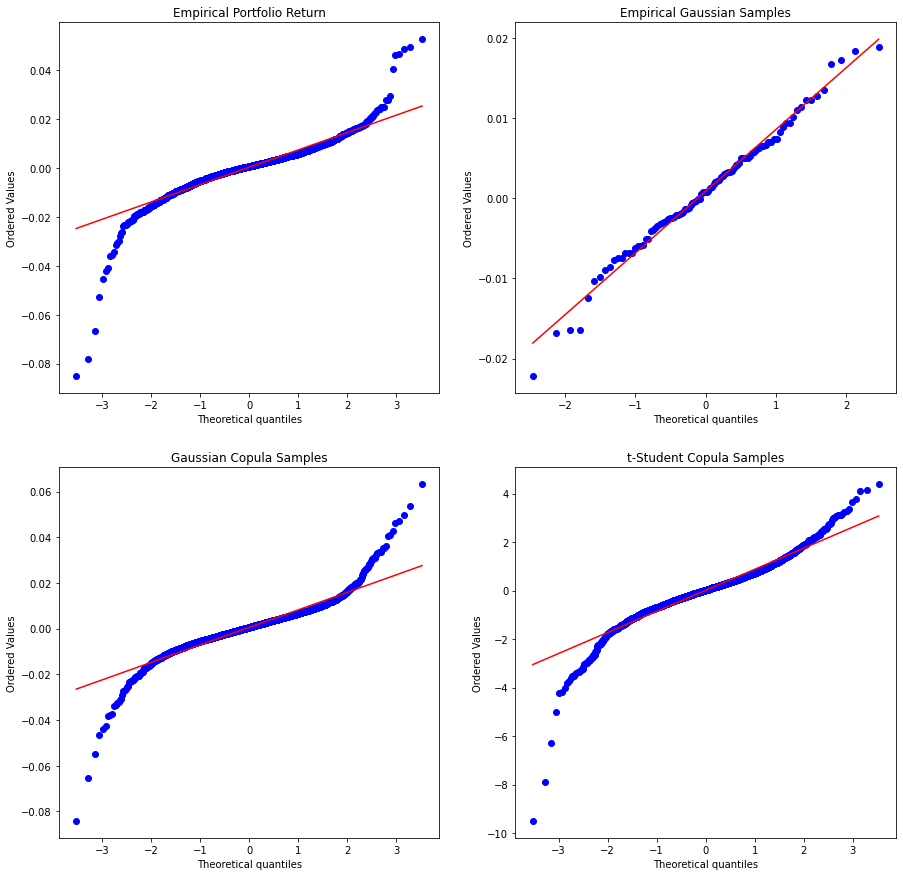

In [208]:
nsample = 100
fig, ax = plt.subplots(figsize=(15,15))

ax1 = plt.subplot(221)
x = daily_portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax1.set_title('Empirical Portfolio Return')

ax2 = plt.subplot(222)
x = portfolio_norm_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax2.set_title('Empirical Gaussian Samples')

ax3 = plt.subplot(223)
x = portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax3.set_title('Gaussian Copula Samples')

ax4 = plt.subplot(224)
x = portfolio_t_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax4.set_title('t-Student Copula Samples')

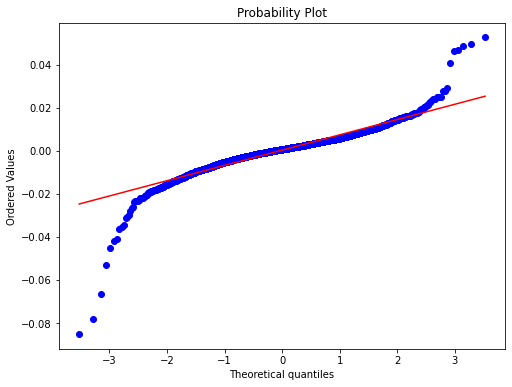

In [211]:
x = daily_portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
#ax1.set_title('Empirical Portfolio Return')
plt.gcf().set_size_inches(8,6)